# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100000)
import Data_Preprocessing as dp
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec
from tensorflow.keras.models import load_model

In [19]:
df=pd.read_csv('all_data.csv')

In [3]:
df.shape

(458197, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


In [5]:
df['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

In [6]:
df['dialect'].value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

This dataset is imbalanced

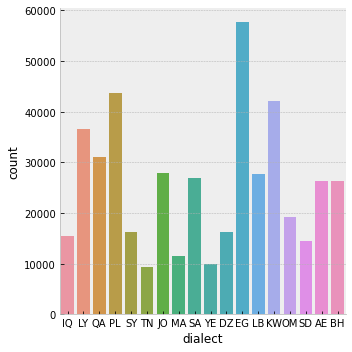

In [7]:
sns.catplot(x='dialect',kind='count',data=df)

In [8]:
df=df.rename(columns={'dialect':'label'})
df.drop(['id'],inplace=True,axis=1)
df

,label,text
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. حيونه ووحشيه .. وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب ..
2,IQ,@KanaanRema مبين من كلامه خليجي
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...
458192,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتعملي هيك فينا 😔😔
458195,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [20]:
results = set()
df['text'].str.lower().str.split().apply(results.update)
print('Number of words in the dataset before preprocessing = ',len(results))

Number of words in the dataset before preprocessing =  895950


In [24]:
print(list(results)[:20])

['https://t.co/l6dtgirayd', 'أعوامي', 'http://t.co/3kclpjaoto', 'اتمسكو', 'بنغاليه', 'بجيبتي', '@donahmed993', 'لقياگ', 'ويخلوني', 'ماقدر😂😂😂😂', 'للرائع', 'ومقويهم', '،يحارب', 'ومابدك', '@wadreen', 'ياعبدالرحيم.', '@pandasdn', 'متفيجه', 'https://t.co/auivl6jbzp', '@mmo1o2_']


In [11]:
# df['text']=df['text'].apply(lambda x: dp.preprocesss(x))
# df

In [12]:
# df.to_csv('preprocessed_df_2.csv',index=False)

In [25]:
df=pd.read_csv('preprocessed_df_2.csv')
df

,label,text
0,IQ,بالنهايه ينتفض يغير
1,IQ,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالارهاب
2,IQ,مبين كلامه خليجي
3,IQ,يسلملي مرورك وروحك الحلوه
4,IQ,وين الغيبه اخ محمد
...,...,...
458192,BH,مبسوطين منك الي باسطانا
458193,BH,واله ماينده ابش يختي
458194,BH,شو عملنا لك حنا تهربي منا احنا مساكين ليش بتعملي هيك فينا
458195,BH,اله يبارك وبالعافيه


In [26]:
results = set()
df['text'].str.lower().str.split().apply(results.update)
print('Number of words in the dataset after preprocessing = ',len(results))

Number of words in the dataset after preprocessing =  432726


In [30]:
print(list(results)[:20])

['لانقضاض', 'اتمسكو', 'لاتكروا', 'بنغاليه', 'بجيبتي', 'وتزبلها', 'لقياگ', 'ويخلوني', 'لتصيف', 'حيجني', 'ومتطاول', 'ومقويهم', 'ومابدك', 'وذنينا', 'متفيجه', 'وتسمعين', 'فمصيره', 'سكّرنا', 'خرابيشه', 'فلاتشوهين']


In [32]:
y = df['label']
X= df['text']

In [33]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y,test_size=0.2 ,stratify=df['label'], random_state= 0)

In [34]:
tf_vect=TfidfVectorizer(analyzer='char',ngram_range=(1,7))

In [35]:
tfidf_vectorizer_vectors=tf_vect.fit_transform(X_train)

In [42]:
print('number of features: ',tfidf_vectorizer_vectors.shape[1])

number of features:  11086742


In [17]:
pipe = Pipeline([('vectorizer', TfidfVectorizer(analyzer='char',ngram_range=(1,7))), ('linearsvc', LinearSVC())])

In [18]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 7))),
                ('linearsvc', LinearSVC())])

In [19]:
print(pipe.score(X_test,Y_test))

0.5666412047140986


In [20]:
Y_predict=pipe.predict(X_test)

In [21]:
print(classification_report(Y_test , Y_predict ,target_names=df['label'].unique()))

              precision    recall  f1-score   support

          IQ       0.46      0.44      0.45      5259
          LY       0.42      0.34      0.38      5258
          QA       0.65      0.55      0.60      3237
          PL       0.70      0.88      0.78     11527
          SY       0.66      0.56      0.61      3099
          TN       0.45      0.36      0.40      5584
          JO       0.50      0.63      0.56      8422
          MA       0.63      0.71      0.67      5524
          SA       0.66      0.71      0.69      7300
          YE       0.80      0.62      0.70      2308
          DZ       0.48      0.38      0.43      3823
          EG       0.51      0.58      0.54      8749
          LB       0.50      0.52      0.51      6214
          KW       0.45      0.48      0.46      5367
          OM       0.75      0.59      0.66      2887
          SD       0.51      0.32      0.39      3248
          AE       0.72      0.46      0.57      1849
          BH       0.45    

In [ ]:
pickle.dump(pipe, open('linearsvcmodel.pkl', 'wb'))

# LSTM Model

In [7]:
# t = Tokenizer()
# t.fit_on_texts(X_train)

In [ ]:
# pickle.dump(t, open('tokenizer.pkl', 'wb'))

In [22]:
t=pickle.load(open('tokenizer.pkl', 'rb'))

In [23]:
vocab_size = len(t.word_index) + 1
vocab_size

378172

In [24]:
# integer encode the documents
encoded_X_train = t.texts_to_sequences(X_train)
encoded_X_test = t.texts_to_sequences(X_test)

In [25]:
max_len=0
for i in X_train:
    max_len=max(len(i),max_len)
print(max_len)

280


In [26]:
# pad documents to a max length of 4 words
padded_X_train = pad_sequences(encoded_X_train, maxlen=max_len, padding='post')
padded_X_test = pad_sequences(encoded_X_test, maxlen=max_len, padding='post')

In [27]:
len(padded_X_train)

366557

In [13]:
# load the whole embedding into memory
w2v_embeddings_index={}
TOTAL_EMBEDDING_DIM=300
embeddings_file="D:/full_grams_cbow_300_twitter/full_grams_cbow_300_twitter.mdl"
w2v_model =KeyedVectors.load(embeddings_file)
for word in w2v_model.wv.vocab:
    w2v_embeddings_index[word] = w2v_model[word]
print('Loaded %s word vectors.'% len(w2v_embeddings_index))

Loaded 1476715 word vectors.


In [14]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, TOTAL_EMBEDDING_DIM))
for word, i in t.word_index.items():
    embedding_vector = w2v_embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print('Embedding Matrix shape:', embedding_matrix.shape)

Embedding Matrix shape: (378172, 300)


In [33]:
mapping={'AE': 16,'BH': 17,'DZ': 10,'EG': 11,'IQ': 0,'JO': 6,'KW': 13,'LB': 12,'LY': 1,'MA': 7,'OM': 14,'PL': 3,
         'QA': 2,'SA': 8,'SD': 15,'SY': 4,'TN': 5,'YE': 9}

In [16]:
Y_train = Y_train.apply(lambda x: mapping[x])
Y_test = Y_test.apply(lambda x: mapping[x])

In [17]:
Y_train=tf.keras.utils.to_categorical(Y_train, num_classes = 18)
Y_test=tf.keras.utils.to_categorical(Y_test, num_classes = 18)

In [39]:
bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, TOTAL_EMBEDDING_DIM, weights=[embedding_matrix], input_length=max_len, trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax'),
                             ])

In [40]:
bilstm.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [41]:
bilstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 280, 300)          113451600 
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 18)                1170      
                                                                 
Total params: 113,647,906
Trainable params: 196,306
Non-trainable params: 113,451,600
_________________________________________________________________


In [42]:
history = bilstm.fit(padded_X_train,
                     Y_train,
                     epochs = 5,
                     verbose = 1)

Epoch 1/5
11455/11455 [==============================] - 1934s 169ms/step - loss: 1.7438 - accuracy: 0.4428
Epoch 2/5
11455/11455 [==============================] - 1756s 153ms/step - loss: 1.5980 - accuracy: 0.4908
Epoch 3/5
11455/11455 [==============================] - 1875s 164ms/step - loss: 1.5509 - accuracy: 0.5060
Epoch 4/5
11455/11455 [==============================] - 1965s 172ms/step - loss: 1.5188 - accuracy: 0.5158
Epoch 5/5
11455/11455 [==============================] - 2040s 178ms/step - loss: 1.4957 - accuracy: 0.5235


In [43]:
bilstm.save('lstm_model.h5')

In [44]:
history.model.evaluate(padded_X_test, Y_test)

2864/2864 [==============================] - 223s 77ms/step - loss: 1.6173 - accuracy: 0.4886


[1.6172754764556885, 0.48858577013015747]

In [52]:
lstm_model = load_model('lstm_model.h5')
tok = pickle.load(open('tokenizer.pkl', 'rb'))

In [29]:
X_test_lstm = tok.texts_to_sequences(X_test)
X_test_lstm = pad_sequences(X_test_lstm, maxlen=280, padding='post')

In [30]:
Y_pred_lstm = lstm_model.predict(X_test_lstm)

In [31]:
Y_pred_lstm1=[np.argmax(i) for i in Y_pred_lstm]

In [34]:
for i in range(len(Y_pred_lstm1)):
    for k, v in mapping.items():
        if v == Y_pred_lstm1[i]:
            Y_pred_lstm1[i] = k

In [35]:
Y_pred_lstm = pd.Series(Y_pred_lstm1)

In [36]:
print(classification_report(Y_test , Y_pred_lstm ,target_names=df['label'].unique()))

              precision    recall  f1-score   support

          IQ       0.40      0.30      0.35      5259
          LY       0.27      0.27      0.27      5258
          QA       0.49      0.48      0.48      3237
          PL       0.68      0.86      0.76     11527
          SY       0.62      0.47      0.54      3099
          TN       0.34      0.28      0.30      5584
          JO       0.45      0.55      0.50      8422
          MA       0.56      0.58      0.57      5524
          SA       0.60      0.63      0.61      7300
          YE       0.70      0.52      0.60      2308
          DZ       0.31      0.31      0.31      3823
          EG       0.42      0.56      0.48      8749
          LB       0.50      0.31      0.38      6214
          KW       0.33      0.48      0.39      5367
          OM       0.69      0.52      0.59      2887
          SD       0.43      0.24      0.31      3248
          AE       0.63      0.32      0.42      1849
          BH       0.44    